<a href="https://colab.research.google.com/github/bb-wg02/cal_ds1/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Context**
From analysis challenge:
'Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? [...] What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? [...]

**Initial Conclusions**

The coupon program is only 41% for bar coupons.

**However, the data suggests that targeting a particular segment may increase the bar coupon type acceptance.**

**Those that frequent a bar periodically are highly likely to accept a bar coupon as as long as they do not have kids in the car**

**The most promising age segment is age 21 to 31.**


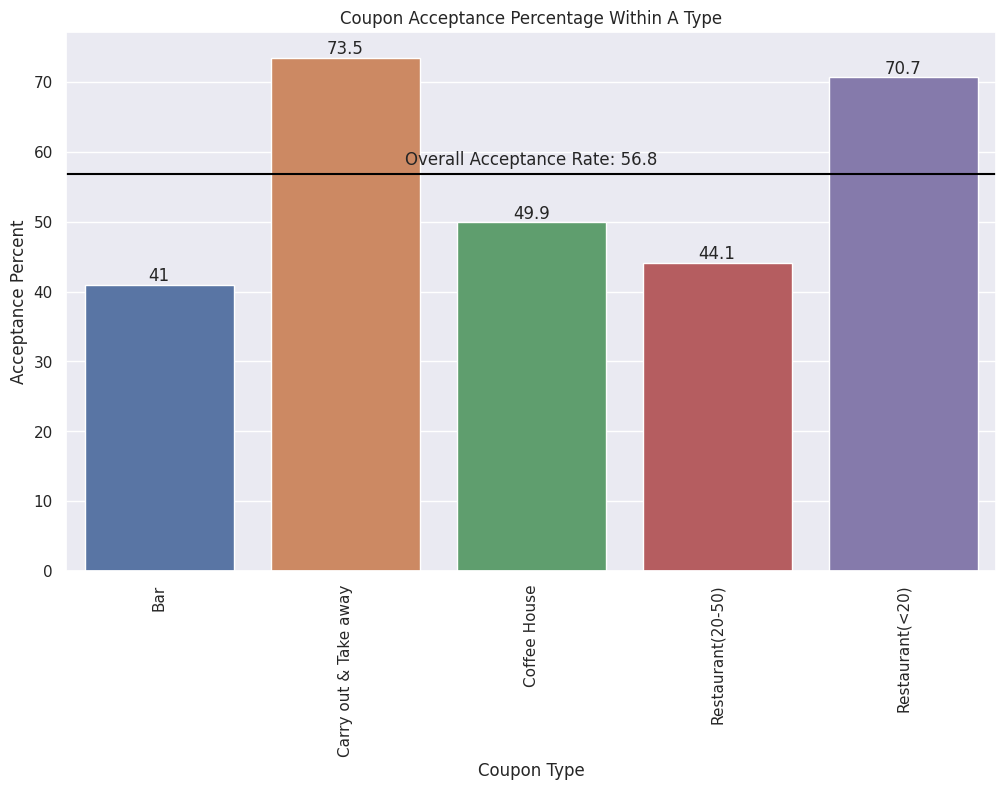

Bar visit frequency correlated to coupon acceptance


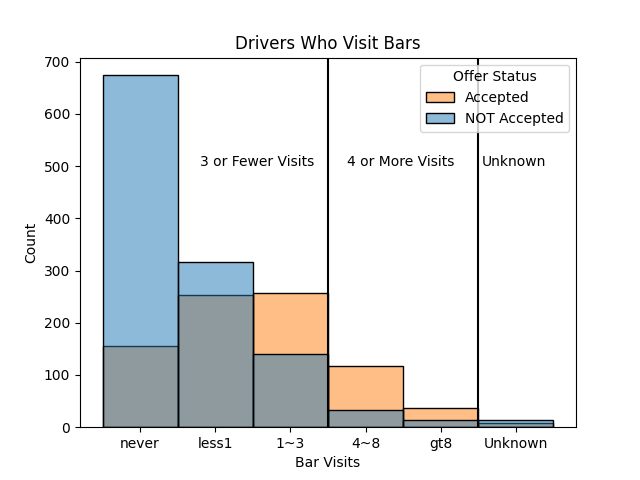

Acceptance oppositely correlated to Kids as passengers

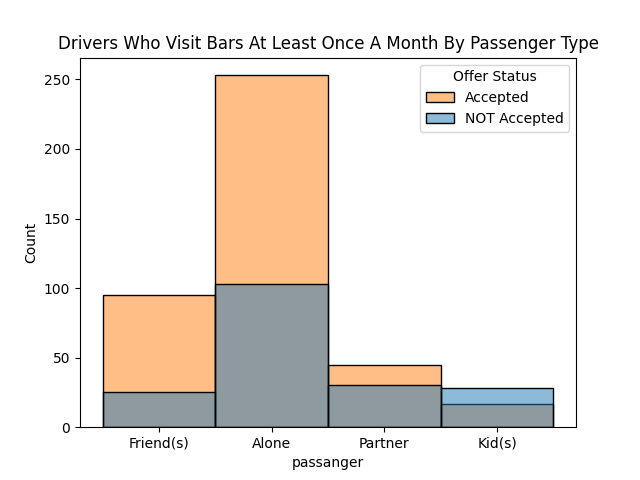

Ages 21, 26, and 31 as a group accept coupons at the highest ratio as well as total volume.

For the data we have that is clean/known, those that are over 25 and go to a bar once a month ACCEPT more than twice as often as others: 69.5% vs 33.5% is a significant difference. We can potentially infer that periodic bar customers that are over 25 are highly positively incentivized by coupons.

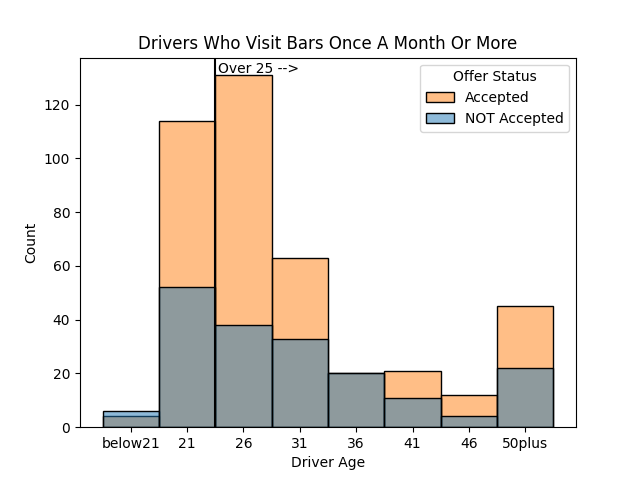

#Key finding:

**Drivers who:**
*   **Go to bars once a month or more, and**
*   **Do not have kids in the car, and**
*   **Are ages 21,26, and 31**

**Accept coupons at this rate:**
##**72.6% -> 300 of 413**##



##  Additional Analysis Ideas
From a marketing business perspective, it will be important to determine how to ascertain who will not have a kid in the car. The passenger insight may not be an actionable.

To strengthen the analysis, the following might be helpful:


1.   For periodic bar visitors, find acceptance rate related to various occupations and marital status. Look for correlations.
2.   Do a round of further analysis of other types of coupons to have a better idea if the bar coupon type is a strong relative segment to invest in.

After this analysis, look at the overall size of the demographics correlated to high acceptance rate. Also, assess the ability to target them with marketing. Given the relatively high acceptance rate of 'Carry Out & Takeaway' and inexpensive restaurants, it might be more profitable overall to analyze that data to look for large and actionable marketing targets. But if the demographic with high acceptance of bar coupon types is large enough and able to be targeted, then it is likely a worthwhile investment to grow this segment.

Lastly, I would try to get data on overall profitability of stores participating. Increasing the coupon acceptance rate of a customer segment already going frequently could have adverse effects on net profits.



##Digging into The Analysis Done So Far

To review the process of data access, cleaning, and analysis as well as to see additional relevant visualizations, please see [prompt.ipynb](https://raw.githubusercontent.com/bb-wg02/cal_ds1/main/prompt.ipynb) in this repository.

##APPENDIX: Data quality and meaning assumptions

Some important assumptions about the data set used for the analysis:

1.   The car columns is almost all nulls. I do not use it in the analysis.
2.   Cofee house, bar, carryaway, restlessthan20 and rest20to50 are each missing in about 1-2% of the data set. Changed these values to 'Unknown' so that these values become more visible in charting.
3.   In coupon field, going to assume Carryout & Takeway is mutually exclusive from the other fields. Meaning the coupon is exclusively about Carryout & Takeway from any type of food vendor (Restaurant, Bar, etc). Assuming we don't know where the Carryout & Takeaway was actually from.



